## Spam Email Classifier with KNN using TF-IDF scores

1.   Assignment must be implemented in Python 3 only.
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for evaluation metrics, data visualization (matplotlib etc.).
3.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
4.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
5.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
6.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

**Task: Given an email, classify it as spam or ham**

Given input text file ("emails.txt") containing 5572 email messages, with each row having its corresponding label (spam/ham) attached to it.

This task also requires basic pre-processing of text (like removing stopwords, stemming/lemmatizing, replacing email_address with 'email-tag', etc..).

You are required to find the tf-idf scores for the given data and use them to perform KNN using Cosine Similarity.

### Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import string
from nltk.stem import PorterStemmer
import math
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load dataset

In [ ]:
#with open('emails.txt') as f:
 #   emails = f.readlines()
    
dataset=pd.read_csv("emails.txt",delimiter='\t',header=None)
dataset.columns=['Label','Email']

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Preprocess data

In [ ]:
lemma = WordNetLemmatizer()

for index,row in dataset.iterrows():
    x=row['Email']
    x=x.lower()
    x=" ".join(x.split())
    punctuations=string.punctuation
    for punc in punctuations:
        x=x.replace(punc,"")
    x=word_tokenize(x)
    
    x=[lemma.lemmatize(i) for i in x]
    x=[i for i in x if i.isnumeric()==False]
        
    filtered_words = [word for word in x if word not in stopwords.words('english')]
    
    ps=PorterStemmer()
    words=list()
    for w in filtered_words:
        words.append(ps.stem(w))
    row['Email']=words


### Split data

In [ ]:
from sklearn.model_selection import train_test_split

x_df = dataset['Email']
y_df = dataset['Label']
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=50)


3380                                   [dear, umma, call]
729            [exactli, anyway, far, jide, studi, visit]
3337                           [u, go, back, urself, lor]
2212    [gettin, bit, arti, collag, mo, well, tryin, n...
3208                 [phone, ha, weirdest, auto, correct]
                              ...                        
3330            [sac, score, big, hundredh, set, batsman]
70                    [wah, lucki, man, save, money, hee]
132                      [dear, call, tmorrowpl, accomod]
2014    [great, news, call, freefon, claim, guarante, ...
1931                                     [carri, disturb]
Name: Email, Length: 4179, dtype: object

In [ ]:
#for training set

#idf
idfDict={}
for row in x_train:
    for i in set(row):
        if i not in idfDict:
            idfDict[i]=1
        else:
            idfDict[i]+=1
n=len(idfDict)
for i in idfDict:
    idfDict[i]=math.log10(n/(1+float(idfDict[i])))

#tf
tfList=[]
for row in x_train:
    wordDict= dict.fromkeys(idfDict.keys(),0)
    n=len(set(row))
    for i in set(row):
        if i in idfDict:
            wordDict[i]+=1
    for j in wordDict:
            if(n>0):
                wordDict[j]/=float(n)
    tfList.append(wordDict)


# tfidf
newList=[]
for row in tfList:
    temp=[]
    for i in row:
        row[i]=row[i]*idfDict[i]
        temp.append(row[i])
    newList.append(np.array(temp))

newList=np.array(newList)

In [ ]:
#for test set

tfList2=[]
for row in x_test:
    wordDict= dict.fromkeys(idfDict.keys(),0)
    n=len(set(row))
    for i in set(row):
        if i in idfDict:
            wordDict[i]+=1
    for j in wordDict:
        if(n>0):
            wordDict[j]/=float(n)
    tfList2.append(wordDict)

newList2=[]
# tfidf
for row in tfList2:
    temp=[]
    for i in row:
        row[i]=row[i]*idfDict[i]
        temp.append(row[i])
    newList2.append(np.array(temp))

newList2=np.array(newList2)
y_train=np.array(y_train)

In [ ]:
### Train your KNN model (reuse previously iplemented model built from scratch) and test on your data

In [ ]:
def cosine_dist(list1,list2):
    return 1-(dot(list1,list2)/(norm(list1)*norm(list2)))
    
def euc_dist(list1, list2):
    return norm(list1-list2)
    
def manhat_dist(list1,list2):
    return np.abs(list1-list2).sum()
    

In [ ]:
def knn(newList,newList2,y_train,k,mode):

    if mode==1: #cosine
        res=[]
        for row in newList2:
            it=0
            temp=[]
            a=row
            for r in newList:
                b=r
                cos_sim = cosine_dist(a,b)
                temp.append((cos_sim,y_train[it]))
                it=it+1
            temp.sort()
            temp=list(map(lambda x: x[1], temp))
            res.append(temp[:k])
        return res

    elif mode==2: #euclid
        res=[]
        for row in newList2:
            it=0
            temp=[]
            a=row
            for r in newList:
                b=r
                val = euc_dist(a,b)
                temp.append((val,y_train[it]))
                it=it+1
            temp.sort()
            temp=list(map(lambda x: x[1], temp))
            res.append(temp[:k])
        return res
    
    else:  #manhattan
        res=[]
        for row in newList2:
            it=0
            temp=[]
            a=row
            for r in newList:
                b=r
                val = manhat_dist(a,b)
                temp.append((val,y_train[it]))
                it=it+1
            temp.sort()
            temp=list(map(lambda x: x[1], temp))
            res.append(temp[:k])
        return res

***1. Experiment with different distance measures [Euclidean distance, Manhattan distance, Hamming Distance] and compare with the Cosine Similarity distance results.***

In [ ]:
#calculate prediction

def calc_ypred(list):
    y_pred=[]
    for i in list:
        spam=0
        ham=0
        for j in i:
            if j=='spam':
                spam=spam+1
            else:
                ham=ham+1
        if ham>spam:
            y_pred.append('ham')
        else:
            y_pred.append('spam')
    return y_pred


In [ ]:
res1=knn(newList,newList2,y_train,5,1)
res2=knn(newList,newList2,y_train,5,2)
res3=knn(newList,newList2,y_train,5,3)

res1=calc_ypred(res1)
res2=calc_ypred(res2)
res3=calc_ypred(res3)

cos_conf=confusion_matrix(y_test, res1, labels=["ham", "spam"])
euc_conf=confusion_matrix(y_test, res2, labels=["ham", "spam"])
man_conf=confusion_matrix(y_test, res3, labels=["ham", "spam"])

tp1=cos_conf[0][0]
fp1=cos_conf[0][1]
fn1=cos_conf[1][0]
tn1=cos_conf[1][1]
tp2=euc_conf[0][0]
fp2=euc_conf[0][1]
fn2=euc_conf[1][0]
tn2=euc_conf[1][1]
tp3=man_conf[0][0]
fp3=man_conf[0][1]
fn3=man_conf[1][0]
tn3=man_conf[1][1]

acc1=(tp1+tn1)/(tp1+fp1+fn1+tn1)
acc2=(tp2+tn2)/(tp2+fp2+fn2+tn2)
acc3=(tp3+tn3)/(tp3+fp3+fn3+tn3)
prec1=tp1/(tp1+fp1)
prec2=tp2/(tp2+fp2)
prec3=tp3/(tp3+fp3)
rec1=tp1/(tp1+fn1)
rec2=tp2/(tp2+fn2)
rec3=tp3/(tp3+fn3)
fsc1=(2*tp1/((2*tp1)+fp1+fn1))
fsc2=(2*tp2/((2*tp2)+fp2+fn2))
fsc3=(2*tp3/((2*tp3)+fp3+fn3))

print("For default value of k=5")
print("\nConfusion Matrix")
print("Cosine: \n",cos_conf)
print("Euclid: \n",euc_conf)
print("Manhattan: \n",man_conf)
print("\nAccuracy")
print("Cosine: ",acc1)
print("Euclid: ",acc2)
print("Manhattan: ",acc3)
print("\nPrecision")
print("Cosine: ",prec1)
print("Euclid: ",prec2)
print("Manhattan: ",prec3)
print("\nRecall")
print("Cosine: ",rec1)
print("Euclid: ",rec2)
print("Manhattan: ",rec3)
print("\nF1 Score")
print("Cosine: ",fsc1)
print("Euclid: ",fsc2)
print("Manhattan: ",fsc3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


For default value of k=5

Confusion Matrix
Cosine: 
 [[1213    4]
 [  49  127]]
Euclid: 
 [[1215    2]
 [ 112   64]]
Manhattan: 
 [[1217    0]
 [ 121   55]]

Accuracy
Cosine:  0.9619526202440776
Euclid:  0.91816223977028
Manhattan:  0.9131371141421393

Precision
Cosine:  0.9967132292522597
Euclid:  0.9983566146261298
Manhattan:  1.0

Recall
Cosine:  0.9611727416798732
Euclid:  0.9155990957045969
Manhattan:  0.9095665171898356

F1 Score
Cosine:  0.9786204114562324
Euclid:  0.9551886792452831
Manhattan:  0.952641878669276


***2. Explain which distance measure works best and why? Explore the distance measures and weigh their pro and cons in different application settings.***

According to the above obtained results, the cosine distance measure works the best as it has the highest accuracy, recall, and F1 score among the three.

The reason why cosine distance measure worked best is because of 'curse of dimensionality'. Due to this, euclidean distance and manhattan distance is not good for higher dimensions. Cosine similarity is often used to counteract euclidean distance problem. Cosine similarity is advantageous because it does not give importance to magnitude of vectors, instead it values the orientation. 


**Cosine Similarity** : This metric is mainly used to find similarities between two data points. As the cosine distance between the data points increases, the cosine similarity decreases, and vice versa. Thus, points closer to each other are more similar than points that are far away from each other. Cosine similarity is given by Cos θ, and cosine distance is 1- Cos θ.

Pros:

-> It works well with both categorical and continuous datasets.

-> It works better in collaborative filtering where even documents are far apart as it calculates the orientation, and not the distance.

Cons:

-> The disadvantage of cosine similarity is that it doesn't take magnitude of vectors into consideration. 

Application Area: It is used quite frequently when the data is represented by word counts.


**Manhattan Distance**: It is calculated as the sum of the absolute differences between the two vectors. The Manhattan distance is related to the L1 vector norm and the sum absolute error and mean absolute error metric.

Pros:

-> It is easy to generalize into higher dimensions.

-> It works fine when dataset has binary attributes.

Cons:

-> It is less intutive to work in higher dimensional data. 

-> It is likely to give a higher distance than euclidean since it does not take into account shortest path possible.

Application Area: In chess, the distance between squares on the chessboard for rooks is measured in Manhattan distance.

**Euclidean Distance**: The Euclidean distance between two points in Euclidean space is the length of a line segment between the two points.

Pros:

-> Easy to implement and test the results.


Cons:

-> It doesn't work well with higher dimensional data.

Application Area: Applications involving interval data and analysis of health psychology.

***3. Explain why accuracy alone cannot be used to compare and why do we need f1 score***

Accuracy alone can be a measure when data is balanced. In cases where data is unevenly distributed, then accuracy might not be the best measure. Let's say for example, in a dataset containing emails, there are 95% hams and 5% spams. In such a case, if our model is a naive one that classifies the emails as 'ham' every time, we'll end up with 95% accuracy. Therefore, accuracy alone is not a good measure.

Precision tells us what are the chances that our model has made a correct prediction when model predicts a positive value.
Recall is the ratio of correctly predicted value when the actual was positive to total number of value predicted as positive.

When precision increases, recall decreases, and vice versa. So, when we require high true positives, precision is preferred, as it does not consider false negative during calculation, whereas when we are concerened with false negative, recall should be preferred. Lastly, there can be cases where we need a balance between recall and precision. In such cases, we calculate F1 score to maintain the balance.


***4. Choose different K values (k=1,3,5,7,11,17,23,28) and experiment. Plot a graph showing R2 score vs k.***

In [ ]:
def pred_calc(y_test,cur_pred,k):
    x1=confusion_matrix(y_test, cur_pred, labels=["ham", "spam"])
    x1=np.array(x1)
    tp=x1[0][0]
    fp=x1[0][1]
    fn=x1[1][0]
    tn=x1[1][1]

    return (2*tp/((2*tp)+fp+fn))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


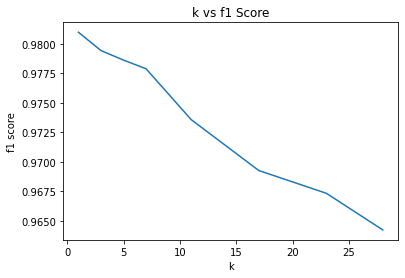

In [ ]:
#k_list.sort()
k_list=[1,3,5,7,11,17,23,28]
x=knn(newList,newList2,y_train,max(k_list),1)
k_vs_f1=[]
x=np.array(x)
for k in k_list:
    cur_pred=calc_ypred(x[:,:k])
    f1=pred_calc(y_test,cur_pred,k)
    k_vs_f1.append([k,f1])
k_vs_f1=np.array(k_vs_f1)

x0 = k_vs_f1[:,0]
y0 = k_vs_f1[:,1]
plt.plot(x0,y0)
plt.xlabel('k')
plt.ylabel('f1 score')
plt.title('k vs f1 Score')
plt.show()

### Train and test Sklearn's KNN classifier model on your data (use metric which gave best results on your experimentation with built-from-scratch model.)

In [91]:
def calc_y_train(my_list):
    new_list=[]
    for i in my_list:
        if i=='ham':
            new_list.append(0)
        else:
            new_list.append(1)
    return new_list


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

new_y_train=calc_y_train(y_train)

classifier=KNeighborsClassifier(n_neighbors=5,metric='cosine',algorithm='brute',n_jobs=-1)
classifier.fit(newList,new_y_train)
y_predicted=classifier.predict(newList2)

new_y_test=calc_y_train(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

***Compare both the models result.***

In [100]:
sklearn_conf=confusion_matrix(new_y_test, y_predicted)

tp4=sklearn_conf[0][0]
fp4=sklearn_conf[0][1]
fn4=sklearn_conf[1][0]
tn4=sklearn_conf[1][1]

acc4=(tp4+tn4)/(tp4+fp4+fn4+tn4)
prec4=tp4/(tp4+fp4)
rec4=tp4/(tp4+fn4)
fsc4=(2*tp4/((2*tp4)+fp4+fn4))

print("For default value of k=5")
print("\nConfusion Matrix")
print("Sklearn KNN: \n",sklearn_conf)
print("My KNN: \n",cos_conf)
print("\nAccuracy")
print("Sklearn KNN: ",acc4)
print("My KNN: ",acc1)
print("\nPrecision")
print("Sklearn KNN: ",prec4)
print("My KNN: ",prec1)
print("\nRecall")
print("Sklearn KNN: ",rec4)
print("My KNN: ",rec1)
print("\nF1 Score")
print("Sklearn KNN: ",fsc4)
print("My KNN: ",fsc1)

For default value of k=5

Confusion Matrix
Sklearn KNN: 
 [[1206   11]
 [  41  135]]
My KNN: 
 [[1213    4]
 [  49  127]]

Accuracy
Sklearn KNN:  0.9626704953338119
My KNN:  0.9619526202440776

Precision
Sklearn KNN:  0.9909613804437141
My KNN:  0.9967132292522597

Recall
Sklearn KNN:  0.967121090617482
My KNN:  0.9611727416798732

F1 Score
Sklearn KNN:  0.9788961038961039
My KNN:  0.9786204114562324


*** 
**What is the time complexity of training using KNN classifier?** 


The time complexity of training using KNN classifier is O(1). This is because, while training, the KNN algorithm only stores the data and does not perform any computation. 

***What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?***